# Example: looking at DPC data


Setup the source and do some preloading.
```
bash$ docker-compose exec --user $(id -u) tdmqc /bin/bash -c 'fake_user.sh python3 ${TDMQ_DIST}/examples/dpc/setup_source.py --source temperature'
```

In [1]:
import logging
logging.basicConfig(level=logging.INFO)
import numpy as np
from tdmq.client import Client, set_log_level
set_log_level(logging.DEBUG)

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

INFO:matplotlib.font_manager:generated new fontManager


In [3]:
c = Client()

DEBUG:tdmq.client.client:New tdmq client object for http://web:8000/api/v0.0
DEBUG:tdmq.client.client:TileDB configuration:
DEBUG:tdmq.client.client:	 tiledb_hdfs_root: hdfs://namenode:8020/arrays
DEBUG:tdmq.client.client:	 tiledb_config:
Parameter                        | Value        
-------------------------------- | -------------
rest.server_serialization_format | 'CAPNP'      
sm.check_coord_dups              | 'true'       
sm.check_coord_oob               | 'true'       
sm.check_global_order            | 'true'       
sm.consolidation.amplification   | '1'          
sm.consolidation.buffer_size     | '50000000'   
sm.consolidation.step_max_frags  | '4294967295' 
sm.consolidation.step_min_frags  | '4294967295' 
sm.consolidation.step_size_ratio | '0'          
sm.consolidation.steps           | '4294967295' 
sm.dedup_coords                  | 'false'      
sm.enable_signal_handlers        | 'true'       
sm.memory_budget                 | '5368709120' 
sm.memory_budget_var      

In [4]:
srcs = c.get_sources({'id': "dpc/meteo-temp-mosaic/v0"})
assert len(srcs) > 0
s = srcs[0]

DEBUG:tdmq.client.client:Added new src_class ('Station', 'TemperatureMosaic') <class 'tdmq.client.sources.NonScalarSource'>.
DEBUG:tdmq.client.client:Using class <class 'tdmq.client.sources.NonScalarSource'> for ('Station', 'TemperatureMosaic').
DEBUG:tdmq.client.client:new managed object 7ccafc31-aa71-5cef-9b47-a2cbd72b9e79


In [5]:
ts = s.timeseries()

DEBUG:tdmq.client.client:get_timeseries(7ccafc31-aa71-5cef-9b47-a2cbd72b9e79, {})


In [6]:
(time, data) = ts[4]

In [7]:
temp = data['TEMP'] * (data['TEMP'] > -9000.0)

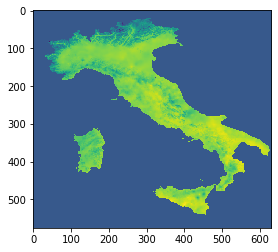

In [8]:
plt.imshow(temp)

In [9]:
(_, sardinia) = ts[4, 300:440, 100:200]

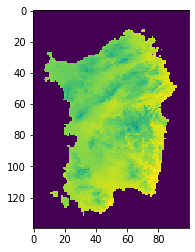

In [10]:
plt.imshow(sardinia['TEMP'] * (sardinia['TEMP'] > -9000.0))

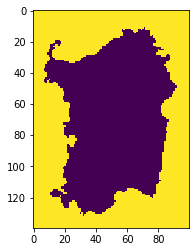

In [11]:
sea = sardinia['TEMP'] == 0
plt.imshow(sea)

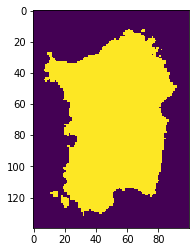

In [12]:
land = sardinia['TEMP'] > 0
plt.imshow(land)

In [13]:
(time, data) = ts[:, 300:440, 100:200]

In [14]:
temp = data['TEMP'] * (data['TEMP'] > -9000)

In [15]:
max_temp = temp.reshape(len(time), -1).max(axis=1)
min_temp = (temp + 200 * (temp == 0.0)).reshape(len(time), -1).min(axis=1)

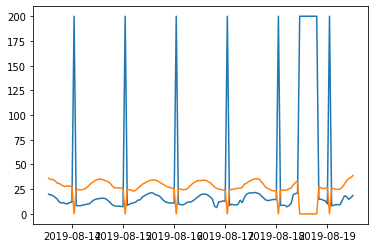

In [16]:
plt.plot(time, np.stack([min_temp, max_temp], axis=1))

In [17]:
good_frames_selector = temp.reshape(len(time), -1).max(axis=1) > 0

In [18]:
good_time = time[good_frames_selector]
good_temp = temp[good_frames_selector]

In [19]:
max_temp = good_temp.reshape(len(good_time), -1).max(axis=1)
min_temp = (good_temp + 200 * (good_temp == 0.0)).reshape(len(good_time), -1).min(axis=1)

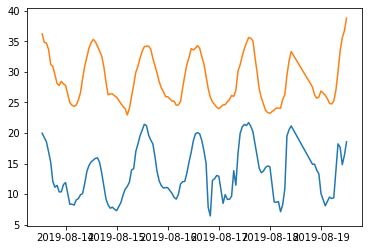

In [20]:
plt.plot(good_time, np.stack([min_temp, max_temp], axis=1))